**EDA on Netflix Movies and Shows Dataset**


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape

(8154, 12)

In [8]:
df.describe()

,release_year
count,8154.000000
mean,2014.503066
std,8.411897
min,1925.000000
25%,2014.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8154 non-null   object
 1   type          8154 non-null   object
 2   title         8154 non-null   object
 3   director      5636 non-null   object
 4   cast          7407 non-null   object
 5   country       7351 non-null   object
 6   date_added    8145 non-null   object
 7   release_year  8154 non-null   int64 
 8   rating        8150 non-null   object
 9   duration      8150 non-null   object
 10  listed_in     8153 non-null   object
 11  description   8153 non-null   object
dtypes: int64(1), object(11)
memory usage: 764.6+ KB


In [10]:
df.nunique()

,0
show_id,8154
type,2
title,8154
director,4188
cast,7129
country,684
date_added,1700
release_year,71
rating,17
duration,216


In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2518
cast,747
country,803
date_added,9
release_year,0
rating,4
duration,4


In [12]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')


In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [15]:
df['movie_minutes'] = df.apply(lambda row: int(row['duration'].split()[0])
                               if row['type'] == 'Movie' and pd.notnull(row['duration']) and row['duration'] != 'Unknown' else None, axis=1)

df['num_seasons'] = df.apply(lambda row: int(row['duration'].split()[0])
                             if row['type'] == 'TV Show' and pd.notnull(row['duration']) and row['duration'] != 'Unknown' else None, axis=1)

**MATPLOTLIB PLOTS**

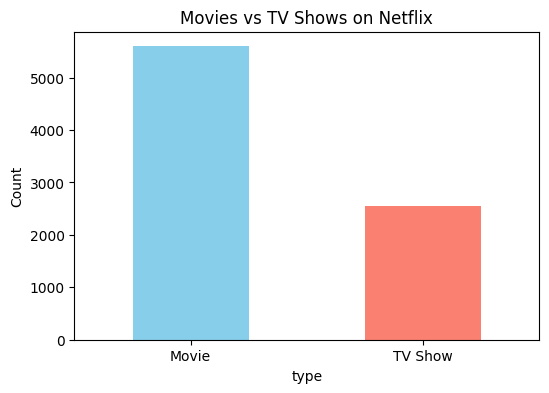

In [16]:
# 1. Bar Plot: Movies vs TV Shows
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Movies vs TV Shows on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

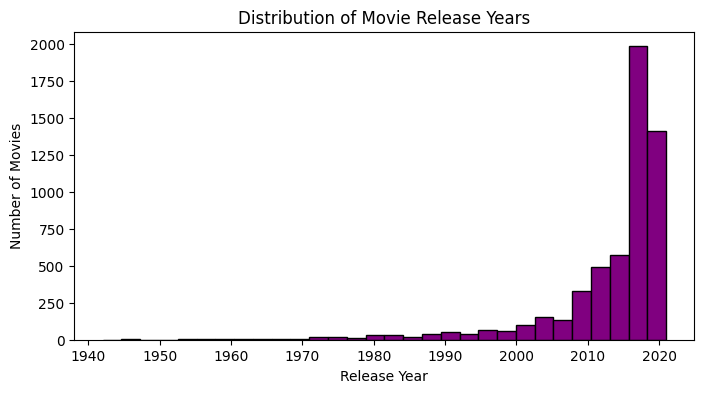

In [17]:
# 2. Histogram: Distribution of Movie Release Years
plt.figure(figsize=(8,4))
plt.hist(df[df['type']=="Movie"]['release_year'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.show()

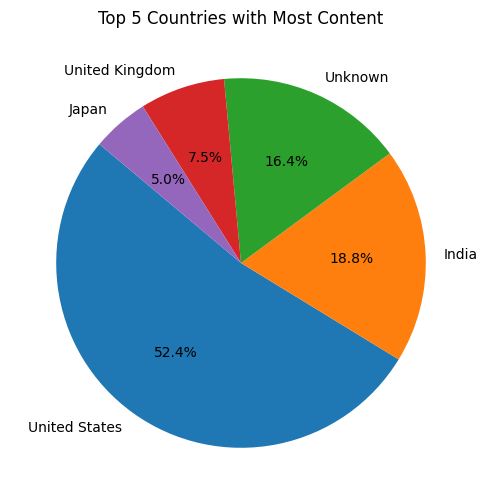

In [19]:
# 3. Pie Chart: Top 5 Countries with Most Content
top_countries = df['country'].dropna().value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries with Most Content")
plt.show()

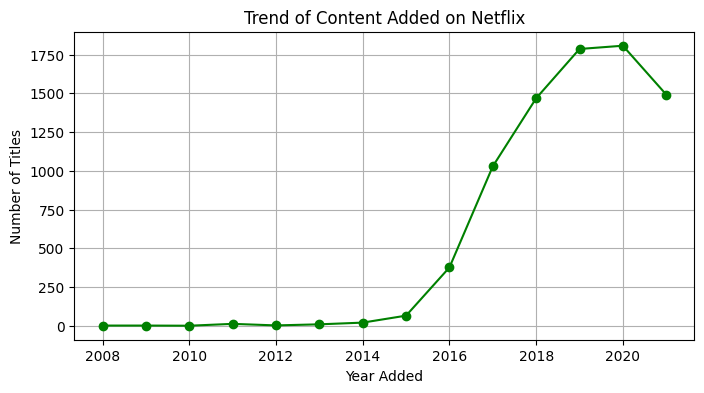

In [31]:
# 4. Line Plot: Trend of Content Added Over Years
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
added_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.plot(added_per_year.index, added_per_year.values, marker='o', color='green')
plt.title("Trend of Content Added on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

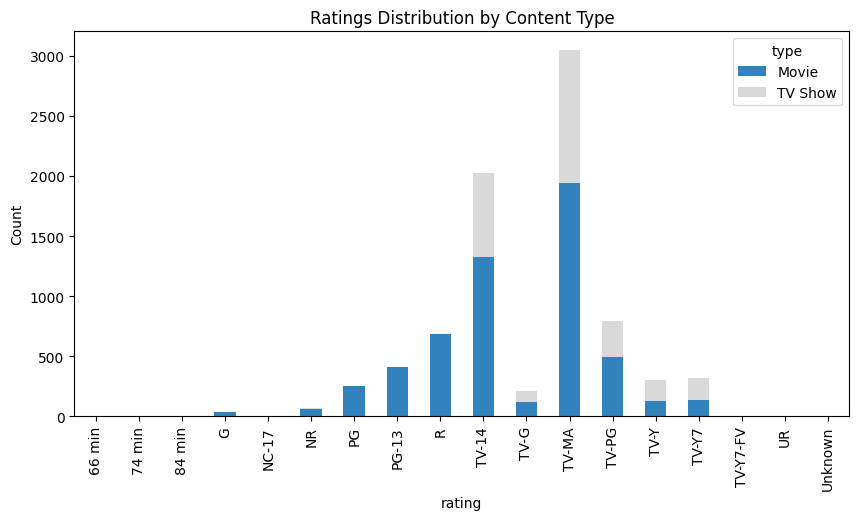

In [20]:
# 5. Stacked Bar: Ratings split by Type
rating_type = df.groupby(['rating','type']).size().unstack()
rating_type.plot(kind='bar', stacked=True, figsize=(10,5), colormap="tab20c")
plt.title("Ratings Distribution by Content Type")
plt.ylabel("Count")
plt.show()


**SEABORN PLOTS**

/tmp/ipython-input-2388693193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


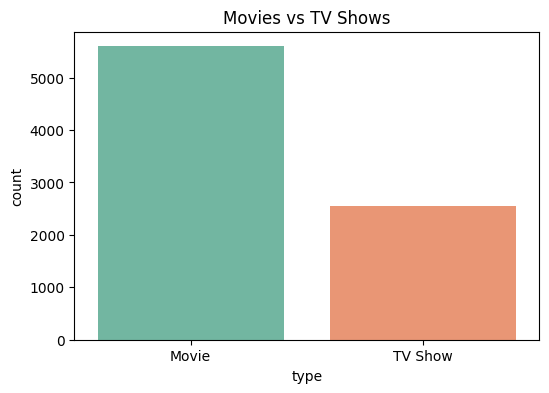

In [21]:
# 1. Countplot: Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Movies vs TV Shows")
plt.show()

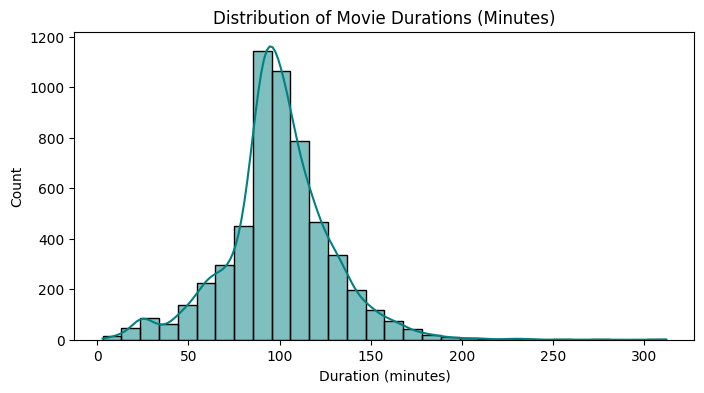

In [22]:
# 2. Histogram + KDE: Movie Durations
plt.figure(figsize=(8,4))
sns.histplot(df['movie_minutes'].dropna(), bins=30, kde=True, color="teal")
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

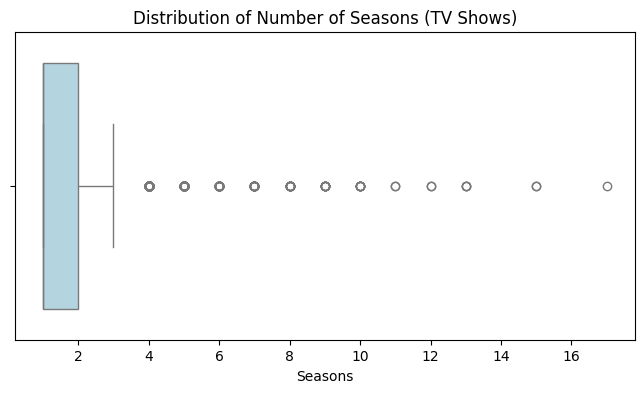

In [23]:
# 3. Boxplot: Number of Seasons in TV Shows
plt.figure(figsize=(8,4))
sns.boxplot(x="num_seasons", data=df, color="lightblue")
plt.title("Distribution of Number of Seasons (TV Shows)")
plt.xlabel("Seasons")
plt.show()

/tmp/ipython-input-3503873229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="genre", data=top_genres, palette="viridis")


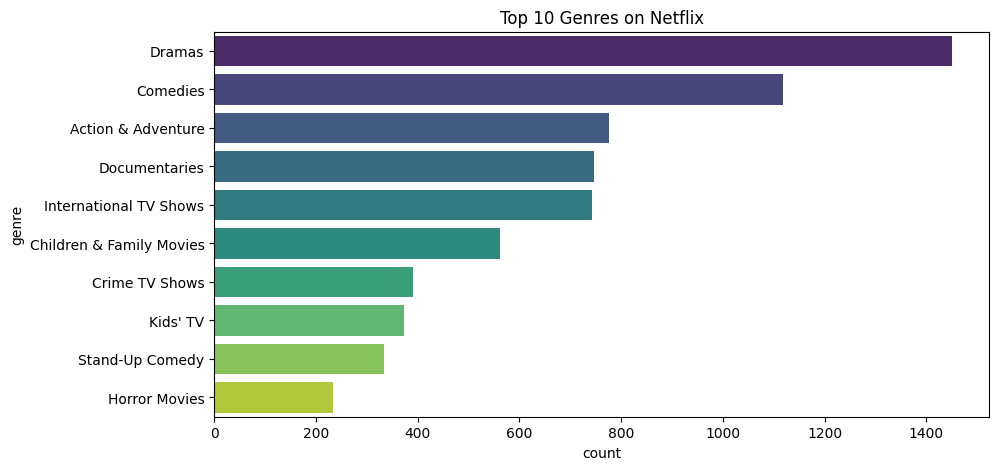

In [25]:
# 4. Barplot: Top 10 Genres (first keyword only)
df['main_genre'] = df['listed_in'].dropna().apply(lambda x: x.split(",")[0])
top_genres = df['main_genre'].value_counts().head(10).reset_index()
top_genres.columns = ['genre','count']
plt.figure(figsize=(10,5))
sns.barplot(x="count", y="genre", data=top_genres, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.show()

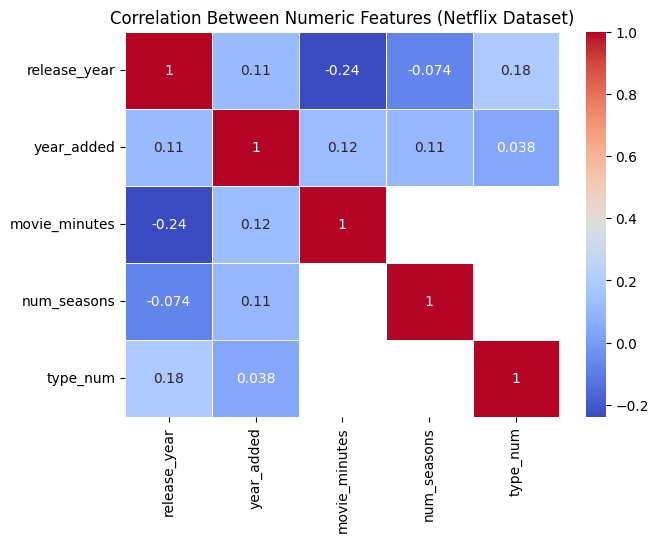

In [30]:
#5. HeatMap : Correlation Between Numeric Features (Netflix Dataset)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['type_num'] = df['type'].map({'Movie':0, 'TV Show':1})
heatmap_df = df[['release_year','year_added','movie_minutes','num_seasons','type_num']]
heatmap_df = heatmap_df.dropna(how='all')
plt.figure(figsize=(7,5))
sns.heatmap(heatmap_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numeric Features (Netflix Dataset)")
plt.show()


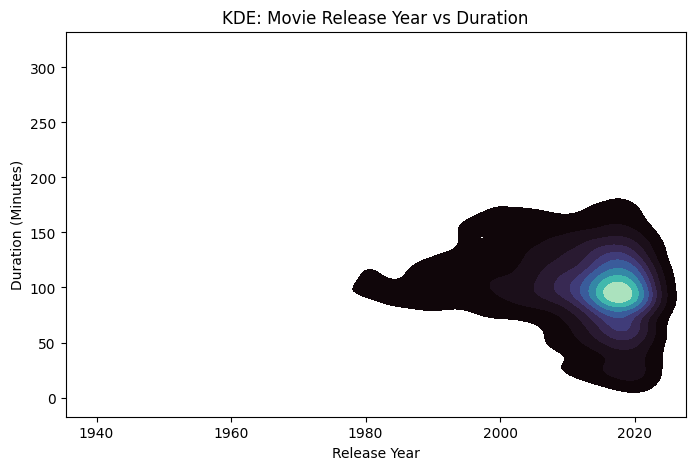

In [27]:
#6.KDE Plot: Release Year vs Movie Duration
plt.figure(figsize=(8,5))
sns.kdeplot(
    x=df['release_year'],
    y=df['movie_minutes'],
    data=df,
    cmap="mako",
    fill=True,
    thresh=0.05
)
plt.title("KDE: Movie Release Year vs Duration")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.show()
